In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df=pd.read_csv("database.csv",encoding='latin1',)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [7]:
df=pd.read_csv("database.csv",encoding='latin1',parse_dates=['Date'],dayfirst=True, index_col='Date')
df.head()

,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
Date,,,,,,,,,,,,,,,,,,,,
1965-02-01,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-04-01,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-05-01,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-08-01,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-09-01,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


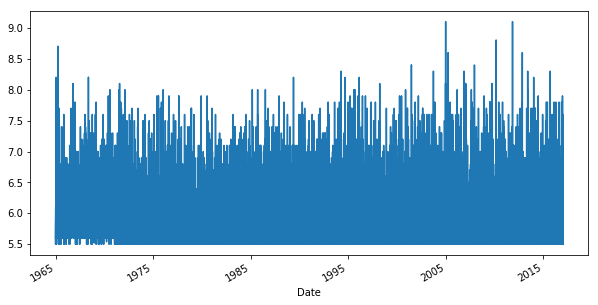

In [9]:
df['Magnitude'].plot(figsize=(10,5))
plt.show()


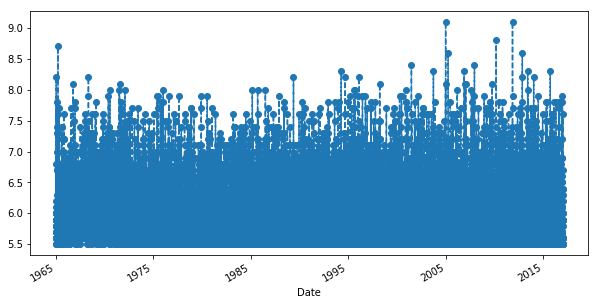

In [10]:
df['Magnitude'].plot(style="o--",figsize=(10,5))
plt.show()


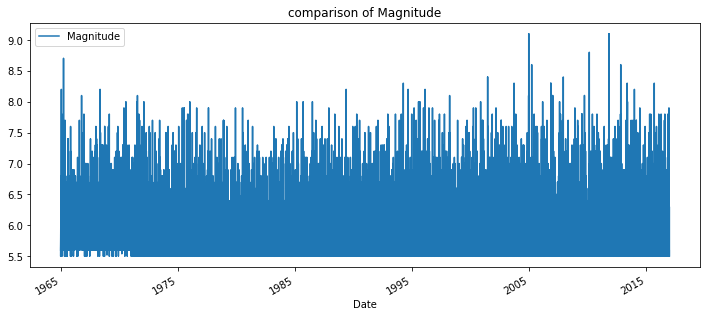

In [11]:
cols=['Magnitude']
df[cols].plot(figsize=(12,5),title="comparison of Magnitude")

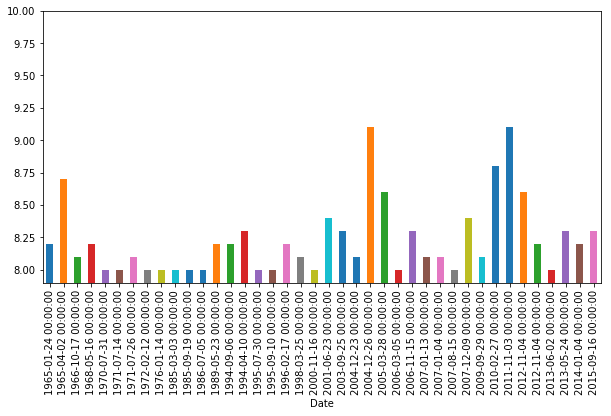

In [12]:
above_8 = df['Magnitude'] >= 8
df[above_8]['Magnitude'].plot(kind='bar', ylim=[7.9,10],figsize=(10,5))

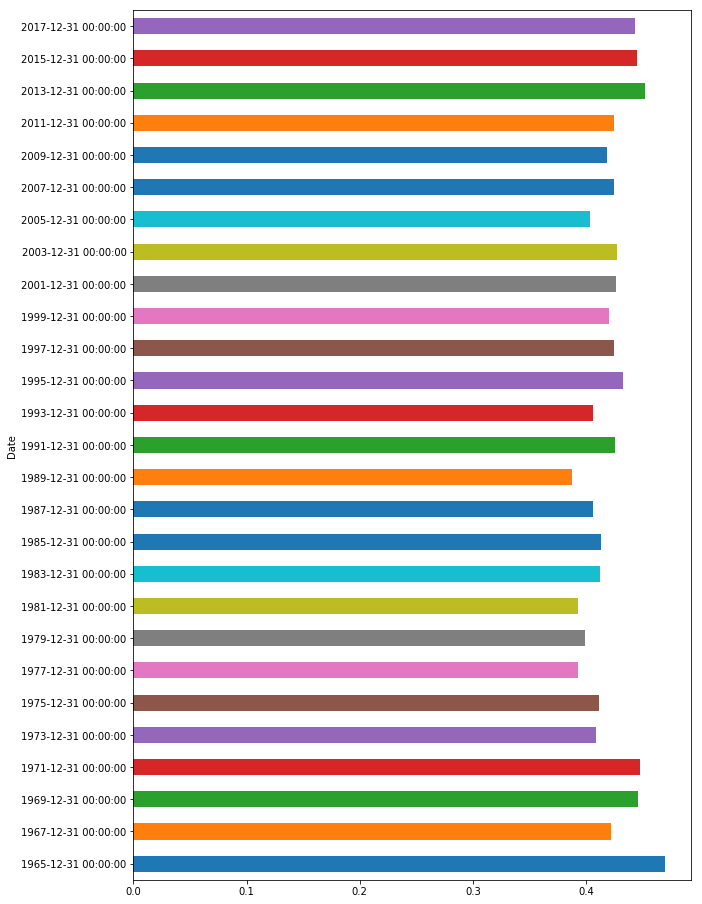

In [13]:
data= df.Magnitude.resample('2Y').apply(np.std)
data.plot(kind='barh',figsize=(10,16))
plt.show()

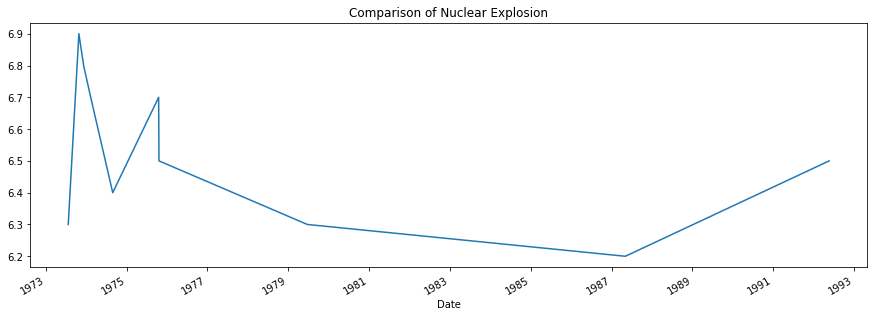

In [14]:
cols=df['Type']=='Nuclear Explosion'
df[cols]['Magnitude'].sort_values().tail(10).plot(figsize=(15,5),title='Comparison of Nuclear Explosion')

# Plot Map

In [15]:
import folium


In [16]:
%matplotlib inline

In [17]:
from folium import plugins

In [18]:
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
locationlist[:1]

[[19.246, 145.616]]

In [19]:
map = folium.Map(location=[19.246, 145.616], zoom_start=2)

In [20]:
for point in range(1000):
    folium.Marker(locationlist[point], popup=df['Type'][point]).add_to(map)
    folium.CircleMarker(locationlist[point],radius=3,popup='earthquakes').add_to(map)


In [ ]:
map.save('result.html')